## **Visualização e interpretação dos dados**

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### **Base de Treino - Análise Exploratória**

In [2]:
# Importando arquivo .csv como um DataFrame pandas
arquivo_treino  =  './dataset/fashion-mnist_train.csv'
train_fmnist = pd.read_csv(arquivo_treino)

In [3]:
# Obtendo dimensões do DataFrame
train_fmnist.shape

(60000, 785)

In [4]:
# Obtendo as primeiras 5 linhas
train_fmnist.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Obtendo se pelo menos uma coluna possui valores nulos
"""  O primeiro any() retorna se há valores nulos em todas as colunas
dada a quantidade de colunas, outro any() é chamado a fim de 
conferir se pelo menos alguma das colunas é nula """
is_null = train_fmnist.isna().any().any()
print("Pelo menos uma coluna possui valores nulos" if is_null else "Nenhuma coluna possui valores nulos" )

Nenhuma coluna possui valores nulos


### **Visualização dos Dados**

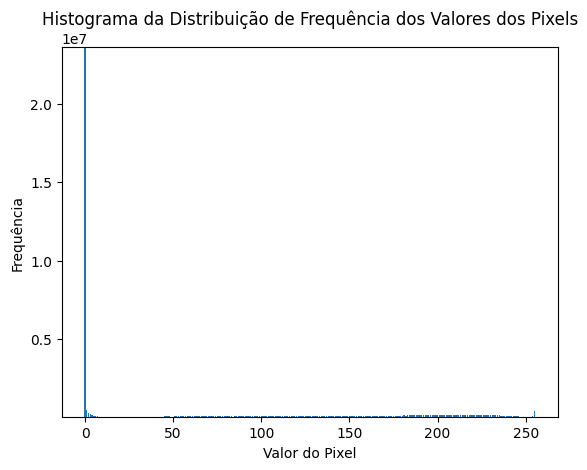

In [6]:
pixels = train_fmnist.drop('label', axis=1)
value_counts = pixels.stack().value_counts().sort_index()

min_value = value_counts.values.min()
max_value = value_counts.values.max()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Valor do Pixel')
plt.ylabel('Frequência')
plt.title('Histograma da Distribuição de Frequência dos Valores dos Pixels')

plt.ylim(min_value, max_value)
plt.show()


> Podemos notar que a maioria dos pixeis possuem intensidade 0, isto é, boa parte da região das imagens possuem a cor preta.

### **Distribuição da intensidade média com base no rótulo** 

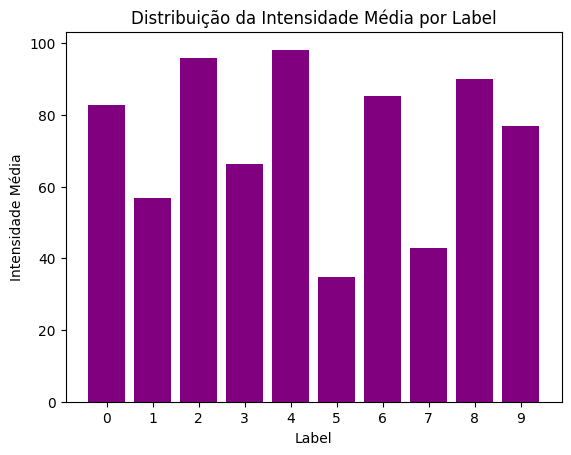

In [7]:
# Calcular a média das intensidades de pixel para cada classe
num_classes = 10  # 10 classes de dígitos (0 a 9)
mean_intensities = np.zeros(num_classes)

for i in range(num_classes):
    class_data = train_fmnist[train_fmnist['label'] == i]
    # Ignorando a coluna de rótulo
    mean_intensity = class_data.iloc[:, 1:].values.mean() 
    mean_intensities[i] = mean_intensity

# Plotar a distribuição da intensidade média por rótulo
plt.bar(range(num_classes), mean_intensities, color='purple')
plt.title('Distribuição da Intensidade Média por Label')
plt.xlabel('Label')
plt.ylabel('Intensidade Média')
plt.xticks(range(num_classes))
plt.show()

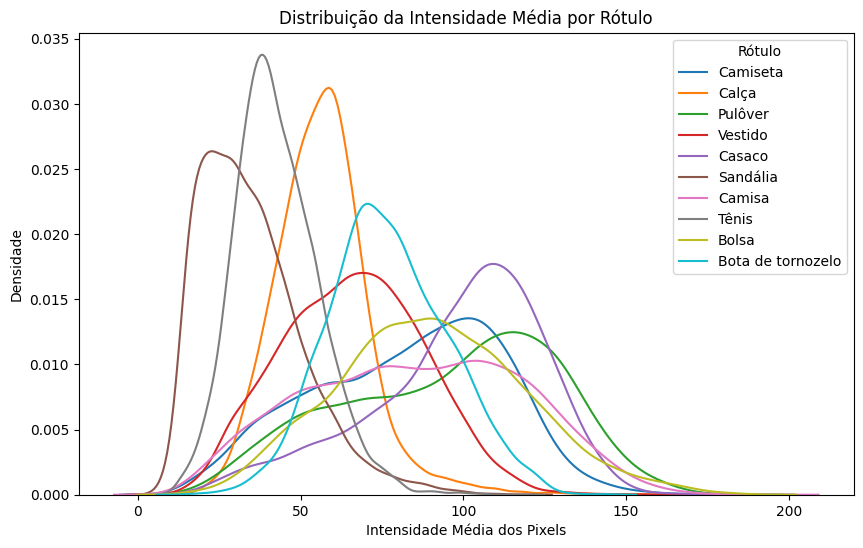

In [8]:
num_classes = 10  # 10 classes de dígitos (0 a 9)
mean_intensities = []

for i in range(num_classes):
    class_data = train_fmnist[train_fmnist['label'] == i]
    mean_intensity = class_data.iloc[:, 1:].values.mean(axis=1)  # Ignorando a coluna de rótulo e calculando a média por linha
    mean_intensities.append(mean_intensity)

label_dictionary = {0: "Camiseta",
                    1: "Calça",
                    2: "Pulôver",
                    3: "Vestido",
                    4: "Casaco",
                    5: "Sandália",
                    6: "Camisa",
                    7: "Tênis",
                    8: "Bolsa",
                    9: "Bota de tornozelo"}

# Criar um gráfico de densidade
plt.figure(figsize=(10, 6))
for i in range(num_classes):
    # sns.kdeplot(mean_intensities[i], label=str(i))
    sns.kdeplot(mean_intensities[i], label=label_dictionary[i])
plt.title('Distribuição da Intensidade Média por Rótulo')
plt.xlabel('Intensidade Média dos Pixels')
plt.ylabel('Densidade')
plt.legend(title='Rótulo')
plt.show()

> - É possível perceber que em geral o padrão das distribuições parecem seguir uma distribuição normal.  
> - Aparentemente tênia e calça parecer ter a uma distribuição normal mais consistente.

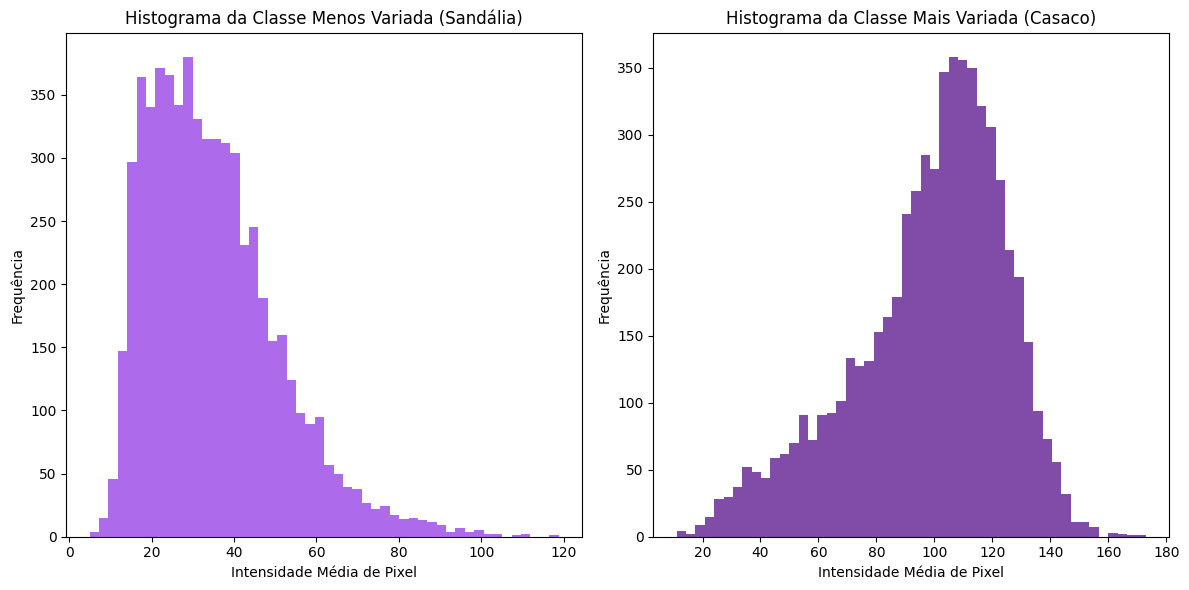

In [9]:
class_variances = []

for i in range(10):
    class_data = train_fmnist[train_fmnist['label'] == i]
    class_variance = np.var(class_data.iloc[:, 1:].values)  # Ignorando a coluna de rótulo
    class_variances.append(class_variance)

# Encontrar os índices das classes mais e menos variadas
most_varied_class = np.argmax(class_variances)
least_varied_class = np.argmin(class_variances)

# Configurar a figura com subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotar histograma da classe mais variada
most_varied_data = train_fmnist[train_fmnist['label'] == most_varied_class].iloc[:, 1:].mean(axis=1)
axs[1].hist(most_varied_data, bins=50, color='indigo', alpha=0.7)
axs[1].set_title(f'Histograma da Classe Mais Variada ({label_dictionary[most_varied_class]})')

# Plotar histograma da classe menos variada
least_varied_data = train_fmnist[train_fmnist['label'] == least_varied_class].iloc[:, 1:].mean(axis=1)
axs[0].hist(least_varied_data, bins=50, color='blueviolet', alpha=0.7)
axs[0].set_title(f'Histograma da Classe Menos Variada ({label_dictionary[least_varied_class]})')

# Adicionar legendas
axs[1].set_xlabel('Intensidade Média de Pixel')
axs[1].set_ylabel('Frequência')
axs[0].set_xlabel('Intensidade Média de Pixel')
axs[0].set_ylabel('Frequência')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os histogramas
plt.show()

### **Criando e Visualizando Exemplos de Imagens no formato PGM ASCII**

In [10]:
for i in range(10):
    class_data = train_fmnist[train_fmnist['label'] == i]
    img_example = class_data.values[0]
    """ 0: "Camiseta/top",
    1: "Calça",
    2: "Pulôver",
    3: "Vestido",
    4: "Casaco",
    5: "Sandália",
    6: "Camisa",
    7: "Tênis",
    8: "Bolsa",
    9: "Bota de tornozelo """
    image_name = './pgm_files/image{i}.pgm'
    pgm_file = open(f'./pgm_files/image{i}.pgm','w')
    format = 'P2'
    height = '28'
    width = '28'
    max_intensity = '255'

    pgm_file.write(format+'\n')
    pgm_file.write(f'{height} {width}'+'\n')
    pgm_file.write(max_intensity+'\n')


    height = 28
    for j in range(len(img_example)):
        pixel = str(img_example[j])
        pgm_file.write(pixel + ' ')
        if j == height:
            pgm_file.write('\n')
            height += 28
    
    print(f'File ./pgm_files/image{i}.pgm created!')
    pgm_file.close()

File ./pgm_files/image0.pgm created!
File ./pgm_files/image1.pgm created!
File ./pgm_files/image2.pgm created!
File ./pgm_files/image3.pgm created!
File ./pgm_files/image4.pgm created!
File ./pgm_files/image5.pgm created!
File ./pgm_files/image6.pgm created!
File ./pgm_files/image7.pgm created!
File ./pgm_files/image8.pgm created!
File ./pgm_files/image9.pgm created!


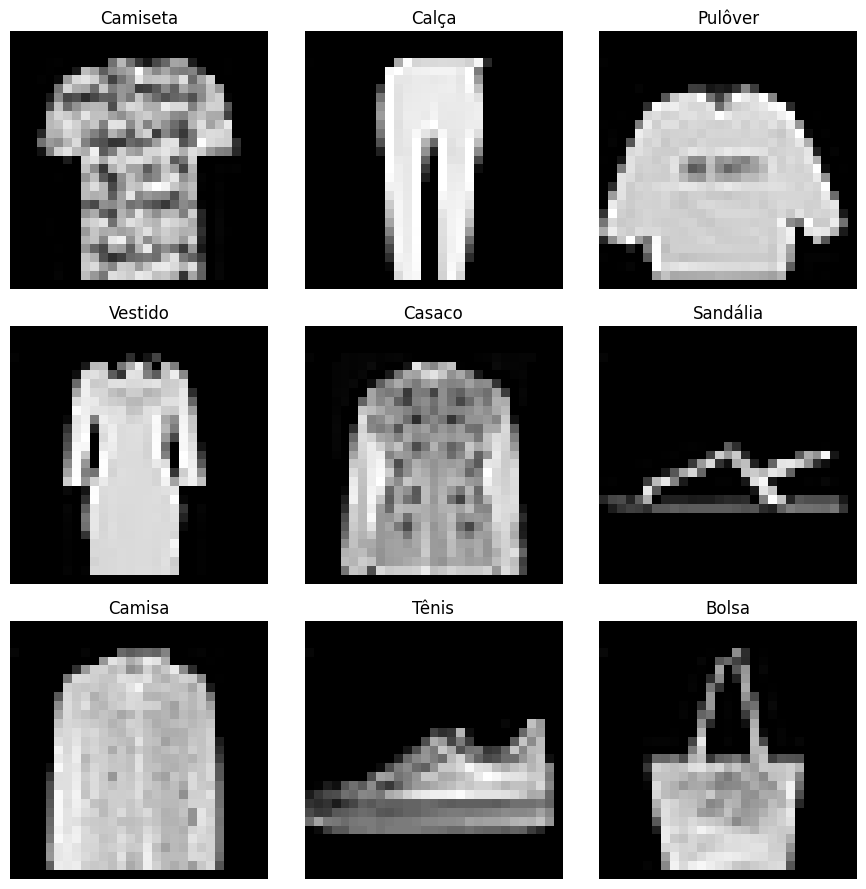

In [11]:
"""
    Lê um arquivo PGM em formato ASCII e retorna a matriz de pixels.
"""
def read_ascii_pgm(filename):
    
    with open(filename, 'r') as f:
        lines = f.readlines()

    width, height = map(int, lines[1].split())

    data = np.zeros((height+1, width+1), dtype=np.uint8)
    for y in range(3,height):
        row = map(int, lines[y].split())
        for x, val in enumerate(row):
            data[y, x] = val
    return data

images = [read_ascii_pgm(f'./pgm_files/image{i}.pgm') for i in range(10)]

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
label=0

for ax, image in zip(axes.ravel(), images):
    ax.imshow(image, cmap='gray', vmin=0, vmax=255)
    ax.axis('off')
    ax.set_title(label_dictionary[label])
    label += 1

plt.tight_layout()
plt.show()

### **Criação e Treinamento do Modelo de Rede Neural Artificial**

In [13]:
import keras
# from tensorflow import data as tf_data
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import ConfusionMatrixDisplay

> - Utilizando a biblioteca TensorFlow,com sua API Keras de alto nível, para construir e treinar a rede neural.  
> - A rede neural possui 3 camadas ocultas e uma camada de saída.   
> - A camada de entrada possui 784 nós, correspondendo ao número de pixels em uma imagem do Fashion MNIST.   
> - As camadas ocultas possuem 200, 100 e 50 nós, respectivamente, e usam a função de ativação ReLU.   
> - A camada de saída possui 10 nós e usa a função de ativação softmax para produzir uma distribuição de probabilidade sobre as peças possíveis.  

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,
              loss=["categorical_crossentropy"],
              metrics=['accuracy'])

model.summary()

In [ ]:
# plot_model(model, show_shapes=True, show_layer_names=True, to_file='./model.png')
plot_model(model, show_shapes=True, show_layer_names=True, dpi=72)

#### **Normalização e One-Hot-Encoding**

In [ ]:
# Variáveis dependentes
X = train_fmnist.drop('label', axis=1)

# Variáveis independentes
Y = train_fmnist['label']

In [ ]:
# Normalizando os valores de pixel para o intervalo [0, 1]
X = X.astype('float32') / 255

> Dividindo os dados em conjuntos de treinamento e validação (80%, 20%).

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

> A ideia principal de dividir o conjunto de dados em um conjunto de validação é evitar que o modelo se torne bom em classificar as amostras no conjunto de treinamento, mas não seja capaz de generalizar e fazer classificações precisas nos dados que não viu antes.

In [ ]:
label_binarizer = LabelBinarizer()
y_train_encoded = label_binarizer.fit_transform(y_train)
y_val_encoded = label_binarizer.fit_transform(y_val)

In [ ]:
print("Label original:", y_train.iloc[1])
print("Label após one-hot encoding:", y_train_encoded[1])

In [ ]:
np.array(x_train)

In [ ]:
history = model.fit(np.array(x_train),
          np.array(y_train_encoded),
          epochs=100,
          batch_size=500,
          verbose=1,
          shuffle=True,
          validation_data=(np.array(x_val), np.array(y_val_encoded)))

In [ ]:
print(history.history)

### **Avaliação de Desempenho nos Dados de Teste**

#### **Pré Processamento dos Dados de Teste**

In [ ]:
test_fminist = pd.read_csv('./dataset/fashion-mnist_test.csv')

In [ ]:
X = test_fminist.drop('label', axis=1)

Y = test_fminist['label']

In [ ]:
x_test = X.astype('float32') / 255

In [ ]:
y_test_encoded = label_binarizer.fit_transform(Y)

In [ ]:
results = model.evaluate(x_test, y_test_encoded, batch_size=128)

print('Test loss:', results[0])
print('Test accuracy:', results[1])

#### **Matriz de Confusão para Avaliação dos Resultados**

In [ ]:
class_names = list(label_dictionary.values())
print(class_names)

In [ ]:
class estimator:
  _estimator_type = ''
  classes_=[]
  def __init__(self, model, classes):
    self.model = model
    self._estimator_type = 'classifier'
    self.classes_ = classes
  def predict(self, X):
    y_prob= self.model.predict(X)
    y_pred = y_prob.argmax(axis=1)
    return y_pred
  
classifier = estimator(model, class_names)

In [ ]:
figsize = (9,9)
ConfusionMatrixDisplay.from_estimator(classifier,X,Y, 
                                      cmap = 'Purples', 
                                      normalize='true', 
                                      ax=plt.subplots(figsize=figsize)[1])


### **Implementação de uma Rede Neural Convolucional**